In [1]:
#Importing required packages.
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
%matplotlib inline
# for high quality images
plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi'] = 100
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Loading dataset
wine = pd.read_csv('winequality-red.csv')

In [3]:
#Let's check how the data is distributed
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
#Information about the data columns
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
print(wine['quality'].value_counts(normalize=True))

5    0.425891
6    0.398999
7    0.124453
4    0.033146
8    0.011257
3    0.006254
Name: quality, dtype: float64


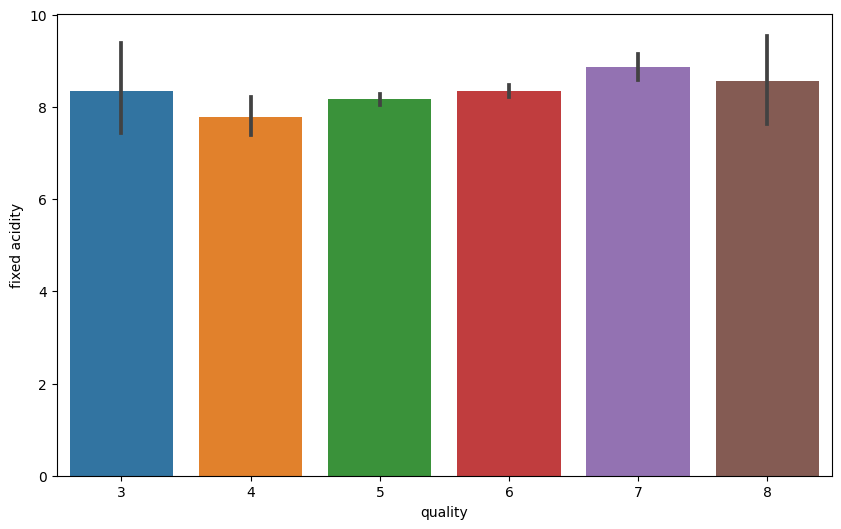

In [6]:
# Here we see that fixed acidity does not give any 
# specification to classify the quality.
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'fixed acidity', data = wine)
plt.show()

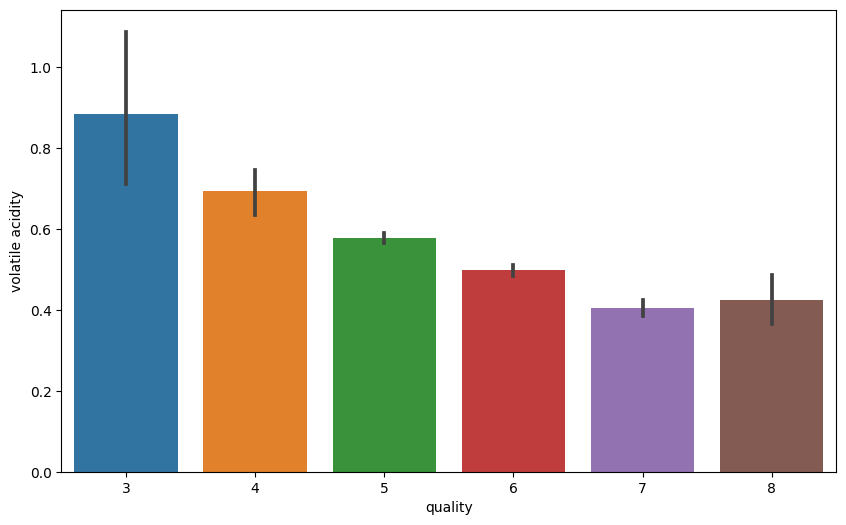

In [7]:
# Here we see that its quite a downing trend in the 
# volatile acidity as we go higher the quality 
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'volatile acidity', data = wine)
plt.show()

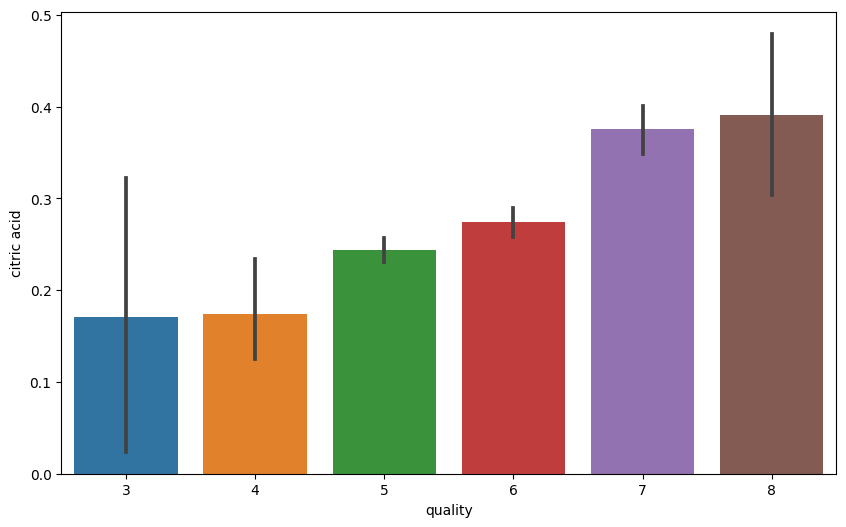

In [8]:
# Composition of citric acid go higher as we go 
# higher in the quality of the wine
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'citric acid', data = wine)
plt.show()

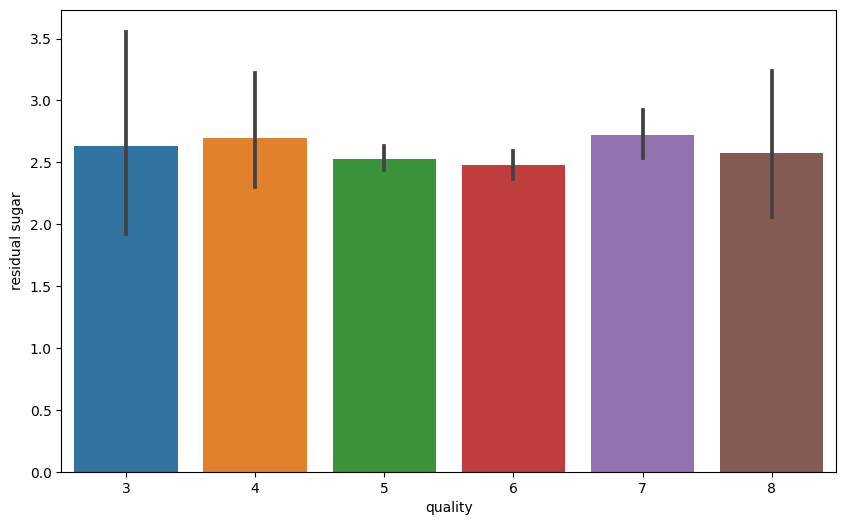

In [9]:
# almost same so significant behavious 
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'residual sugar', data = wine)
plt.show()

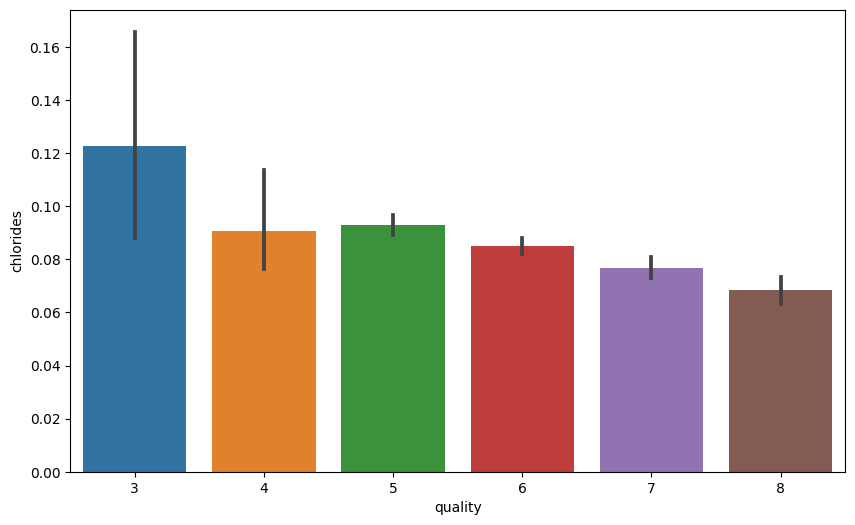

In [10]:
# Composition of chloride also go down as we 
# go higher in the quality of the wine
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'chlorides', data = wine)
plt.show()

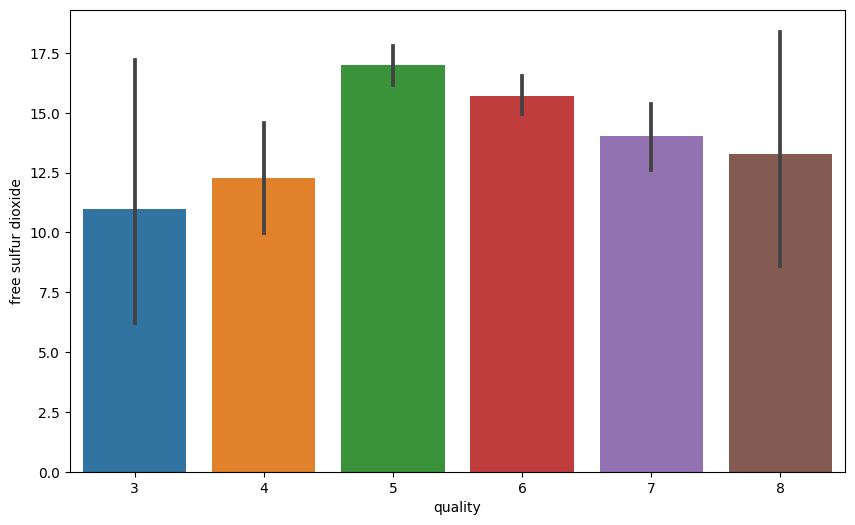

In [11]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'free sulfur dioxide', data = wine)
plt.show()

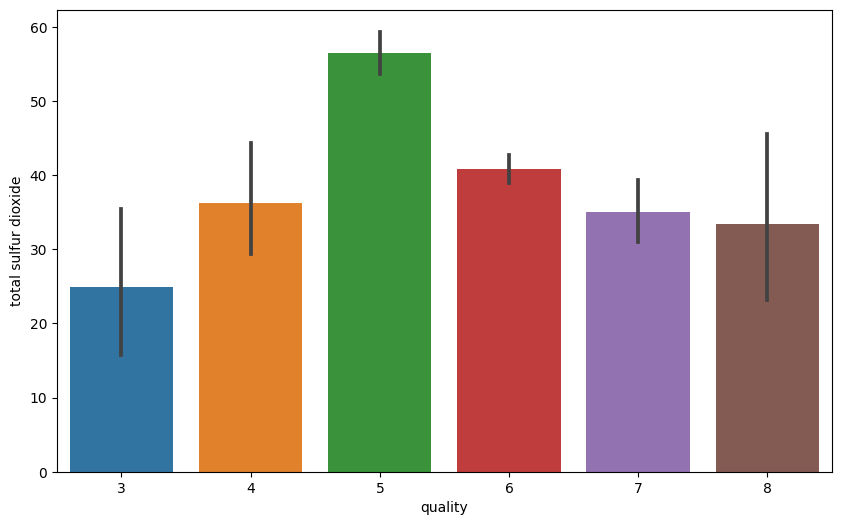

In [12]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'total sulfur dioxide', data = wine)
plt.show()

<AxesSubplot:xlabel='quality', ylabel='sulphates'>

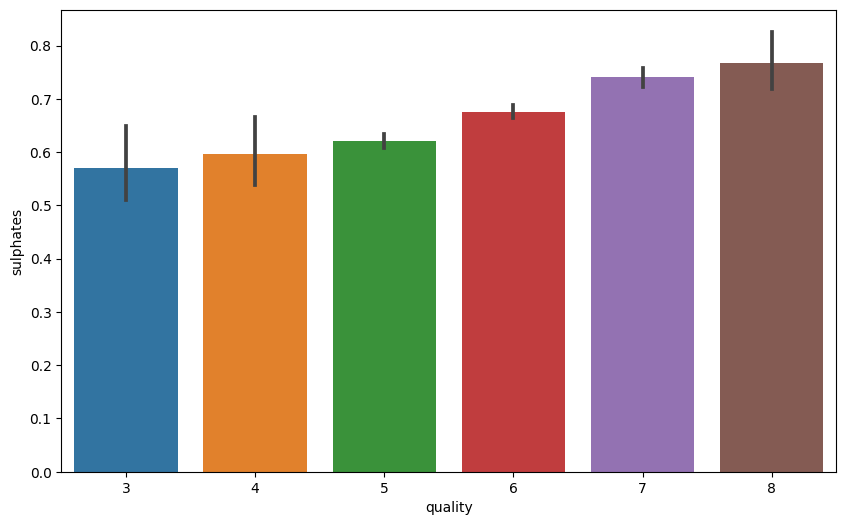

In [13]:
# Sulphates level goes higher with the quality of wine
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'sulphates', data = wine)

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

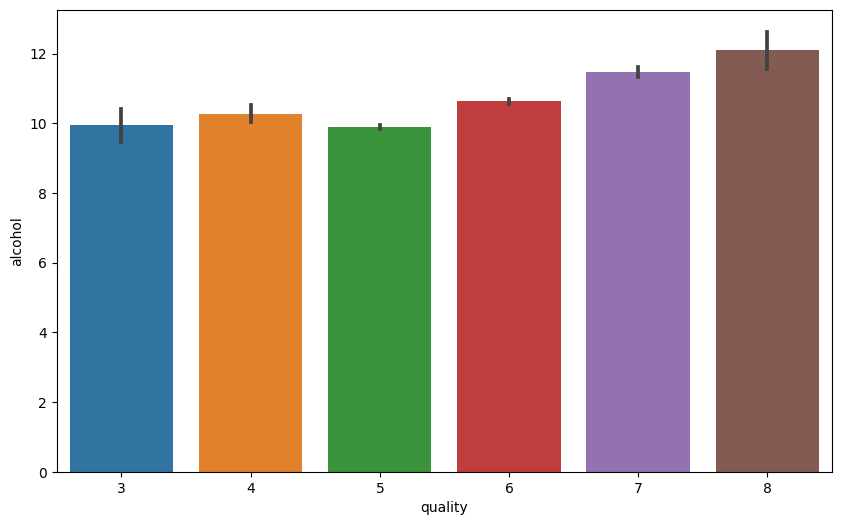

In [14]:
# Alcohol level also goes higher as te quality of wine increases
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'alcohol', data = wine)

## Preprocessing Data for performing Machine learning algorithms

In [15]:
# Making binary classificaion for the response variable.
# Dividing wine as good and bad by giving the limit for the quality
bins = (2, 6.5, 8)
group_names = ['bad', 'good']
wine['target'] = pd.cut(wine['quality'], bins = bins, labels = group_names)

In [16]:
wine.drop('quality', axis=1, inplace=True)

In [17]:
wine['target'].value_counts()

bad     1382
good     217
Name: target, dtype: int64

In [18]:
# Now lets assign a labels to our quality variable
label_quality = LabelEncoder()

In [19]:
#Bad becomes 0 and good becomes 1 
wine['target'] = label_quality.fit_transform(wine['target'])

In [20]:
wine['target'].value_counts()

0    1382
1     217
Name: target, dtype: int64

In [21]:
#Now seperate the dataset as response variable and feature variabes
X = wine.drop('target', axis = 1)
y = wine['target']

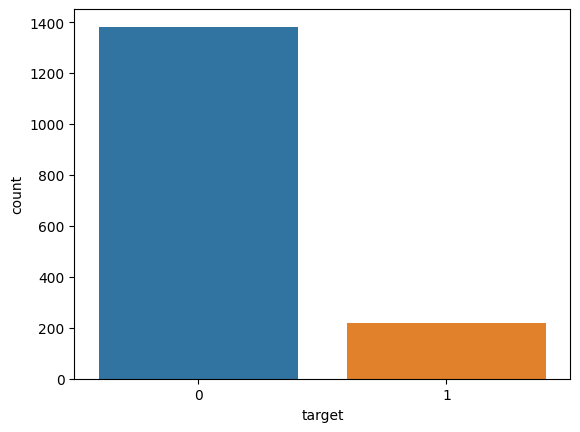

In [22]:
sns.countplot(y)
plt.show()

## SMOTE oversampling

In [23]:
from imblearn.over_sampling import SMOTE
X, y = SMOTE().fit_resample(X, y)

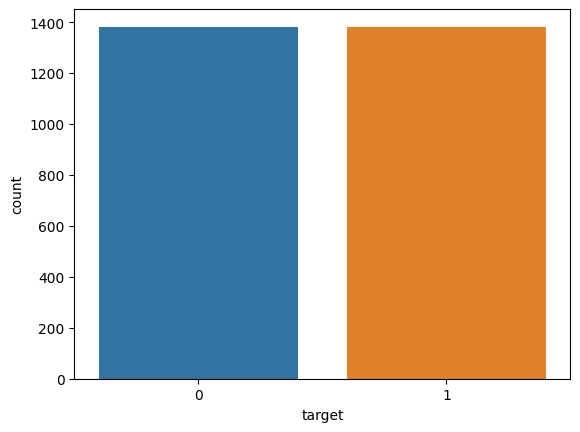

In [24]:
sns.countplot(y)
plt.show()

In [25]:
#Train and Test splitting of data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, 
                                                    stratify=y,
                                                    random_state = 42)

In [26]:
#Applying Standard scaling to get optimized result
sc = StandardScaler()

In [27]:
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

## Support Vector Classifier

In [28]:
svc = SVC()
svc.fit(X_train, y_train)
pred_svc = svc.predict(X_test)

In [29]:
print(classification_report(y_test, pred_svc))
print("Prediction accuracy:{:.2f}".format(accuracy_score(y_test, pred_svc)))

              precision    recall  f1-score   support

           0       0.94      0.87      0.90       277
           1       0.88      0.95      0.91       276

    accuracy                           0.91       553
   macro avg       0.91      0.91      0.91       553
weighted avg       0.91      0.91      0.91       553

Prediction accuracy:0.91


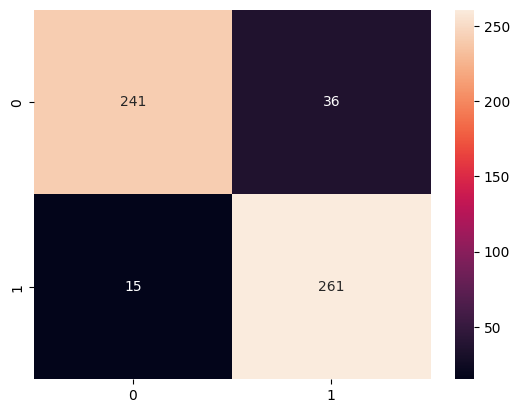

In [30]:
# Confusion matrix for the random forest classification
cn_svm = confusion_matrix(y_test, pred_svc)
sns.heatmap(cn_svm,fmt='g',annot=True)
plt.savefig("SVM_Confusion_After_SMOTE.png")
plt.show()


## Hyper Parameter Tuning using GridSearchCV

In [31]:
#Finding best parameters for our SVC model
param = {
    'C': [0.1,0.8,0.9,1,1.1,1.2,1.3,1.4],
    'kernel':['linear', 'rbf'],
    'gamma' :[0.1,0.8,0.9,1,1.1,1.2,1.3,1.4]
}
grid_svc = GridSearchCV(svc, param_grid=param, scoring='accuracy', cv=10)

In [32]:
grid_svc.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'gamma': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'kernel': ['linear', 'rbf']},
             scoring='accuracy')

In [33]:
#Best parameters for our svc model
grid_svc.best_params_

{'C': 1.4, 'gamma': 1.3, 'kernel': 'rbf'}

In [34]:
#Let's run our SVC again with the best parameters.
svc2 = SVC(C = 1.2, gamma =  0.9, kernel= 'rbf')
svc2.fit(X_train, y_train)
pred_svc2 = svc2.predict(X_test)
print(classification_report(y_test, pred_svc2))
print("Prediction accuracy:{:.2f}".format(accuracy_score(y_test, pred_svc2)))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97       277
           1       0.97      0.98      0.97       276

    accuracy                           0.97       553
   macro avg       0.97      0.97      0.97       553
weighted avg       0.97      0.97      0.97       553

Prediction accuracy:0.97


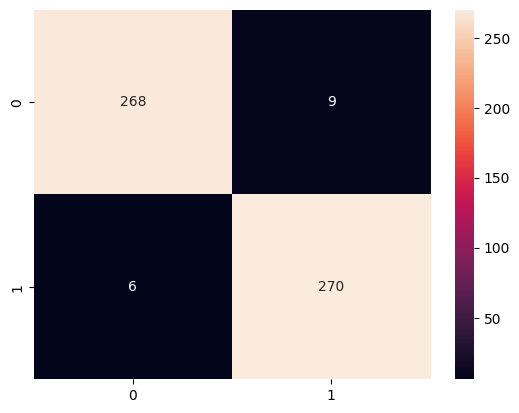

In [35]:
cn_svm = confusion_matrix(y_test, pred_svc2)
sns.heatmap(cn_svm,fmt='g',annot=True)
plt.savefig("SVM_GridCV_Confusion_After_SMOTE.png")
plt.show()

### SVC improves result using Grid Search CV